In [1]:
from __future__ import division, absolute_import

import os
import sys
import random

import numpy as np
import datetime

#root
absPath = '/home/angela/padding_EBI/'
sys.path.insert(0, absPath)

#from src.Target import Target

np.random.seed(8)
random.seed(8)

from src.preprocessing import *
from src.model_architecture import *
from src.training_model import *
from src.postprocessing import *
from src.comparing_results import *
#from src.callbacks import *
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Defining parameters

In [2]:
list_paddings = ['post_padding', 'pre_padding', 'mid_padding', 'stretch_padding', 'ext_padding', 
                 'rdm_padding', 'aug_padding']
list_padding_short = ['post_padding', 'pre_padding', 'mid_padding', 'stretch_padding', 'ext_padding', 
                 'rdm_padding']
#hierarchy of folders: annotation/dataset/architecture/n_neurs/task/padding
folder = 'EC_number/archaea/3denses/bio_neurons/'
column = "EC number"

n_folds = 10

dicti = creating_dict()

max_lenn = 1000

n_class = 2 #number of classes to output
drop_per = 0.2 #Input dropout 
n_neur = [314,77, 8]
drop_hid = 0.5
dict_size = len(dicti)

batch_size = 54
epochss = 200


### Loading stuff

Max length: (9159, 505)


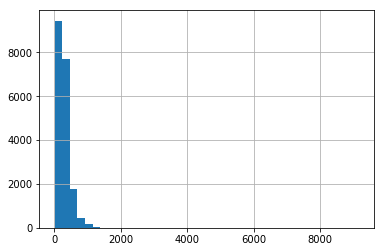

In [3]:
file_idcs_aug = os.path.join(absPath, 'data/', folder, 'idcs_aug_split.pickle')

with open(file_idcs_aug, "rb") as input_file:
    k_aug_indices = pickle.load(input_file)
    
file_idcs = os.path.join(absPath, 'data/', folder, 'idcs_split.pickle')

with open(file_idcs, "rb") as input_file:
    splitting_sets = pickle.load(input_file)

# Defining Deep Learning model  - Task 1

In [8]:
model = building_3dense_model_task1(max_lenn, dict_size, n_neur, n_class, drop_per, drop_hid, 'softmax', folder)

generators_dict = {} 
for model_type in list_paddings:
    generators_dict[model_type] = trainval_generators(splitting_sets, k_aug_indices, model_type, 
                                                      folder, batch_size, 'labels_task1', True)

W0711 21:03:15.824917 139960592238336 deprecation_wrapper.py:119] From /home/angela/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0711 21:03:15.836894 139960592238336 deprecation_wrapper.py:119] From /home/angela/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 21:03:15.838696 139960592238336 deprecation_wrapper.py:119] From /home/angela/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0711 21:03:15.844447 139960592238336 deprecation.py:506] From /home/angela/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is depre

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1000, 26)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000, 26)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 26000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 314)               8164314   
_________________________________________________________________
dropout_2 (Dropout)          (None, 314)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 77)                24255     
_________________________________________________________________
dropout_3 (Dropout)          (None, 77)                0         
__________

In [ ]:
task = "task1/"
for model_type in list_paddings:
    generators = generators_dict[model_type]
    for idx,i in enumerate(generators):
        if model_type == "aug_padding":
            i_train, i_val, i_test = k_aug_indices[idx]
        else:
            i_train, i_val, i_test = splitting_sets[idx]
        len_train, len_val, len_test = len(i_train), len(i_val), len(i_test)
        train_generator, val_generator = i
        folder_cp = ''.join(string for string in [folder, task, model_type, '/', str(idx)]) 
        #print(folder_cp)
        if not os.path.exists(os.path.join(absPath, 'data/checkpoint/', folder_cp)):
            os.makedirs(''.join(string for string in [absPath, 'data/checkpoint/', folder_cp]))

        callbacks_list = calling_callbacks(folder_cp, folder, model_type, None, None, None, 
                                   None, False, False, False, False)
        folder_task1 =  ''.join(string for string in [folder, task])
        model = building_2dense_model_task2(max_lenn, dict_size, n_neur, n_class, drop_per, drop_hid, 'softmax', folder)
        #writing log file 
        log_file = ''.join(string for string in [absPath, 'data/checkpoint/', folder, task, 'log_file.txt' ]) 
        f = open(log_file, 'a+')
        print('Model type: %s \n' % model_type, file=f)
        print('Fold: %i \n' % idx, file=f)
 
        start = time.time()
        formatted_time = datetime.datetime.now()
        print('Starting time: %s \n' % formatted_time, file=f)
        history = model.fit_generator(generator=train_generator, 
                              validation_data=val_generator,
                             steps_per_epoch= int(len_train/batch_size),
                              validation_steps=int(len_val/batch_size),
                             epochs=epochss,
                             callbacks=callbacks_list,
                             verbose=1)
        end = time.time()
        formatted_endtime = datetime.datetime.now()
        print('Finishing time: %s \n' % formatted_endtime, file=f)
        count_time(start, end, folder, model_type)
        saving_results(history, model_type, folder, idx, True)
        f.close()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 1000, 26)          0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 1000, 26)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 26000)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 314)               8164314   
_________________________________________________________________
dropout_22 (Dropout)         (None, 314)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 77)                24255     
_________________________________________________________________
dropout_23 (Dropout)         (None, 77)                0         
__________


Epoch 00032: val_acc did not improve from 0.79280
Epoch 33/200
251/251 [==============================] - 17s 66ms/step - loss: 0.4614 - acc: 0.7684 - val_loss: 0.4846 - val_acc: 0.7886

Epoch 00033: val_acc did not improve from 0.79280
Epoch 34/200
251/251 [==============================] - 17s 66ms/step - loss: 0.4493 - acc: 0.7809 - val_loss: 0.4481 - val_acc: 0.7345

Epoch 00034: val_acc did not improve from 0.79280
Epoch 35/200
251/251 [==============================] - 17s 66ms/step - loss: 0.4387 - acc: 0.7809 - val_loss: 0.4194 - val_acc: 0.7652

Epoch 00035: val_acc did not improve from 0.79280
Epoch 36/200
251/251 [==============================] - 17s 66ms/step - loss: 0.4208 - acc: 0.7979 - val_loss: 0.3780 - val_acc: 0.8267

Epoch 00036: val_acc improved from 0.79280 to 0.82669, saving model to /home/angela/padding_EBI/data/checkpoint/EC_number/archaea/3denses/bio_neurons/task1/post_padding/0/weights-improvement-036-0.8267.hdf5
Epoch 37/200
251/251 [======================

251/251 [==============================] - 17s 66ms/step - loss: 0.2415 - acc: 0.8954 - val_loss: 0.1159 - val_acc: 0.9333

Epoch 00114: val_acc did not improve from 0.93501
Epoch 115/200
251/251 [==============================] - 17s 66ms/step - loss: 0.2460 - acc: 0.8879 - val_loss: 0.1416 - val_acc: 0.9210

Epoch 00115: val_acc did not improve from 0.93501
Epoch 116/200
251/251 [==============================] - 17s 66ms/step - loss: 0.2686 - acc: 0.8870 - val_loss: 0.1640 - val_acc: 0.9193

Epoch 00116: val_acc did not improve from 0.93501
Epoch 117/200
251/251 [==============================] - 17s 66ms/step - loss: 0.2531 - acc: 0.8862 - val_loss: 0.1528 - val_acc: 0.9203

Epoch 00117: val_acc did not improve from 0.93501
Epoch 118/200
251/251 [==============================] - 17s 66ms/step - loss: 0.2450 - acc: 0.8904 - val_loss: 0.1225 - val_acc: 0.9235

Epoch 00118: val_acc did not improve from 0.93501
Epoch 119/200
251/251 [==============================] - 17s 66ms/step - l

251/251 [==============================] - 25s 101ms/step - loss: 0.3995 - acc: 0.8143 - val_loss: 0.3001 - val_acc: 0.8351

Epoch 00042: val_acc did not improve from 0.89413
Epoch 43/200
251/251 [==============================] - 26s 102ms/step - loss: 0.3897 - acc: 0.8232 - val_loss: 0.2605 - val_acc: 0.8763

Epoch 00043: val_acc did not improve from 0.89413
Epoch 44/200
251/251 [==============================] - 25s 102ms/step - loss: 0.3965 - acc: 0.8220 - val_loss: 0.3236 - val_acc: 0.8162

Epoch 00044: val_acc did not improve from 0.89413
Epoch 45/200
251/251 [==============================] - 26s 102ms/step - loss: 0.3905 - acc: 0.8232 - val_loss: 0.2840 - val_acc: 0.8235

Epoch 00045: val_acc did not improve from 0.89413
Epoch 46/200
251/251 [==============================] - 26s 102ms/step - loss: 0.3886 - acc: 0.8237 - val_loss: 0.3411 - val_acc: 0.8026

Epoch 00046: val_acc did not improve from 0.89413
Epoch 47/200
251/251 [==============================] - 25s 101ms/step - 

251/251 [==============================] - 26s 104ms/step - loss: 0.2959 - acc: 0.8671 - val_loss: 0.2016 - val_acc: 0.9102

Epoch 00084: val_acc did not improve from 0.93361
Epoch 85/200
251/251 [==============================] - 26s 103ms/step - loss: 0.3089 - acc: 0.8648 - val_loss: 0.1817 - val_acc: 0.9371

Epoch 00085: val_acc improved from 0.93361 to 0.93711, saving model to /home/angela/padding_EBI/data/checkpoint/EC_number/archaea/3denses/bio_neurons/task1/pre_padding/1/weights-improvement-085-0.9371.hdf5
Epoch 86/200
251/251 [==============================] - 26s 103ms/step - loss: 0.2973 - acc: 0.8724 - val_loss: 0.1894 - val_acc: 0.9046

Epoch 00086: val_acc did not improve from 0.93711
Epoch 87/200
251/251 [==============================] - 26s 103ms/step - loss: 0.2875 - acc: 0.8730 - val_loss: 0.1757 - val_acc: 0.9137

Epoch 00087: val_acc did not improve from 0.93711
Epoch 88/200
251/251 [==============================] - 26s 104ms/step - loss: 0.2952 - acc: 0.8714 - val

251/251 [==============================] - 26s 104ms/step - loss: 0.2670 - acc: 0.8781 - val_loss: 0.1622 - val_acc: 0.9350

Epoch 00125: val_acc did not improve from 0.95178
Epoch 126/200
251/251 [==============================] - 26s 104ms/step - loss: 0.2650 - acc: 0.8789 - val_loss: 0.1382 - val_acc: 0.9333

Epoch 00126: val_acc did not improve from 0.95178
Epoch 127/200
251/251 [==============================] - 26s 103ms/step - loss: 0.2476 - acc: 0.8877 - val_loss: 0.1341 - val_acc: 0.9504

Epoch 00127: val_acc did not improve from 0.95178
Epoch 128/200
251/251 [==============================] - 26s 104ms/step - loss: 0.2501 - acc: 0.8896 - val_loss: 0.1980 - val_acc: 0.9071

Epoch 00128: val_acc did not improve from 0.95178
Epoch 129/200
251/251 [==============================] - 26s 104ms/step - loss: 0.2681 - acc: 0.8730 - val_loss: 0.1432 - val_acc: 0.9294

Epoch 00129: val_acc did not improve from 0.95178
Epoch 130/200
251/251 [==============================] - 26s 104ms/st

Epoch 1/200
251/251 [==============================] - 28s 112ms/step - loss: 0.7523 - acc: 0.5847 - val_loss: 0.7089 - val_acc: 0.3036

Epoch 00001: val_acc improved from -inf to 0.30363, saving model to /home/angela/padding_EBI/data/checkpoint/EC_number/archaea/3denses/bio_neurons/task1/pre_padding/2/weights-improvement-001-0.3036.hdf5
Epoch 2/200
251/251 [==============================] - 27s 108ms/step - loss: 0.6818 - acc: 0.5745 - val_loss: 0.6688 - val_acc: 0.7788

Epoch 00002: val_acc improved from 0.30363 to 0.77883, saving model to /home/angela/padding_EBI/data/checkpoint/EC_number/archaea/3denses/bio_neurons/task1/pre_padding/2/weights-improvement-002-0.7788.hdf5
Epoch 3/200
251/251 [==============================] - 27s 108ms/step - loss: 0.6624 - acc: 0.6079 - val_loss: 0.6232 - val_acc: 0.7170

Epoch 00003: val_acc did not improve from 0.77883
Epoch 4/200
251/251 [==============================] - 27s 109ms/step - loss: 0.6626 - acc: 0.5969 - val_loss: 0.6710 - val_acc: 0


Epoch 00079: val_acc did not improve from 0.91649
Epoch 80/200
251/251 [==============================] - 27s 106ms/step - loss: 0.3067 - acc: 0.8808 - val_loss: 0.2214 - val_acc: 0.8899

Epoch 00080: val_acc did not improve from 0.91649
Epoch 81/200
251/251 [==============================] - 27s 107ms/step - loss: 0.2967 - acc: 0.8831 - val_loss: 0.1611 - val_acc: 0.9193

Epoch 00081: val_acc improved from 0.91649 to 0.91929, saving model to /home/angela/padding_EBI/data/checkpoint/EC_number/archaea/3denses/bio_neurons/task1/pre_padding/2/weights-improvement-081-0.9193.hdf5
Epoch 82/200
251/251 [==============================] - 27s 107ms/step - loss: 0.3027 - acc: 0.8785 - val_loss: 0.1850 - val_acc: 0.9004

Epoch 00082: val_acc did not improve from 0.91929
Epoch 83/200
251/251 [==============================] - 27s 107ms/step - loss: 0.2950 - acc: 0.8777 - val_loss: 0.1758 - val_acc: 0.8924

Epoch 00083: val_acc did not improve from 0.91929
Epoch 84/200
251/251 [===================


Epoch 00157: val_acc did not improve from 0.97310
Epoch 158/200
251/251 [==============================] - 18s 72ms/step - loss: 0.2331 - acc: 0.9056 - val_loss: 0.0781 - val_acc: 0.9776

Epoch 00158: val_acc improved from 0.97310 to 0.97764, saving model to /home/angela/padding_EBI/data/checkpoint/EC_number/archaea/3denses/bio_neurons/task1/pre_padding/2/weights-improvement-158-0.9776.hdf5
Epoch 159/200
251/251 [==============================] - 18s 70ms/step - loss: 0.2135 - acc: 0.9133 - val_loss: 0.0706 - val_acc: 0.9811

Epoch 00159: val_acc improved from 0.97764 to 0.98113, saving model to /home/angela/padding_EBI/data/checkpoint/EC_number/archaea/3denses/bio_neurons/task1/pre_padding/2/weights-improvement-159-0.9811.hdf5
Epoch 160/200
251/251 [==============================] - 18s 70ms/step - loss: 0.2167 - acc: 0.9153 - val_loss: 0.1305 - val_acc: 0.9354

Epoch 00160: val_acc did not improve from 0.98113
Epoch 161/200
251/251 [==============================] - 18s 70ms/step - 

251/251 [==============================] - 24s 96ms/step - loss: 0.5118 - acc: 0.7413 - val_loss: 0.5186 - val_acc: 0.7907

Epoch 00026: val_acc did not improve from 0.85115
Epoch 27/200
251/251 [==============================] - 24s 96ms/step - loss: 0.4923 - acc: 0.7564 - val_loss: 0.5209 - val_acc: 0.8033

Epoch 00027: val_acc did not improve from 0.85115
Epoch 28/200
251/251 [==============================] - 24s 98ms/step - loss: 0.4897 - acc: 0.7779 - val_loss: 0.5162 - val_acc: 0.7631

Epoch 00028: val_acc did not improve from 0.85115
Epoch 29/200
251/251 [==============================] - 24s 97ms/step - loss: 0.4939 - acc: 0.7475 - val_loss: 0.4728 - val_acc: 0.8166

Epoch 00029: val_acc did not improve from 0.85115
Epoch 30/200
251/251 [==============================] - 24s 97ms/step - loss: 0.5021 - acc: 0.7528 - val_loss: 0.4966 - val_acc: 0.7732

Epoch 00030: val_acc did not improve from 0.85115
Epoch 31/200
251/251 [==============================] - 24s 96ms/step - loss: 

251/251 [==============================] - 22s 88ms/step - loss: 0.3465 - acc: 0.8368 - val_loss: 0.1953 - val_acc: 0.8861

Epoch 00065: val_acc did not improve from 0.89902
Epoch 66/200
251/251 [==============================] - 23s 91ms/step - loss: 0.3574 - acc: 0.8381 - val_loss: 0.1840 - val_acc: 0.8847

Epoch 00066: val_acc did not improve from 0.89902
Epoch 67/200
251/251 [==============================] - 23s 91ms/step - loss: 0.3498 - acc: 0.8468 - val_loss: 0.2085 - val_acc: 0.8875

Epoch 00067: val_acc did not improve from 0.89902
Epoch 68/200
251/251 [==============================] - 23s 91ms/step - loss: 0.3396 - acc: 0.8517 - val_loss: 0.1845 - val_acc: 0.8938

Epoch 00068: val_acc did not improve from 0.89902
Epoch 69/200
251/251 [==============================] - 23s 91ms/step - loss: 0.3254 - acc: 0.8529 - val_loss: 0.2043 - val_acc: 0.8823

Epoch 00069: val_acc did not improve from 0.89902
Epoch 70/200
251/251 [==============================] - 23s 91ms/step - loss: 

251/251 [==============================] - 26s 105ms/step - loss: 0.2709 - acc: 0.8823 - val_loss: 0.1212 - val_acc: 0.9158

Epoch 00142: val_acc did not improve from 0.91824
Epoch 143/200
251/251 [==============================] - 26s 105ms/step - loss: 0.2806 - acc: 0.8766 - val_loss: 0.1151 - val_acc: 0.9179

Epoch 00143: val_acc did not improve from 0.91824
Epoch 144/200
251/251 [==============================] - 26s 105ms/step - loss: 0.2837 - acc: 0.8676 - val_loss: 0.1352 - val_acc: 0.9186

Epoch 00144: val_acc improved from 0.91824 to 0.91859, saving model to /home/angela/padding_EBI/data/checkpoint/EC_number/archaea/3denses/bio_neurons/task1/pre_padding/3/weights-improvement-144-0.9186.hdf5
Epoch 145/200
251/251 [==============================] - 26s 104ms/step - loss: 0.2898 - acc: 0.8612 - val_loss: 0.1101 - val_acc: 0.9186

Epoch 00145: val_acc did not improve from 0.91859
Epoch 146/200
251/251 [==============================] - 26s 105ms/step - loss: 0.2772 - acc: 0.8680 -

In [ ]:
next(generators[1][0])[0].shape